In [13]:
TrainingImagePath="C:/Users/Omkar/Train"

In [2]:
validationImagePath = "C:/Users/Omkar/Validation"

In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=71c98e4efd1f72f4b8739600d472e21c5b59ab4d6578c3983d24a45ae49029f0
  Stored in directory: c:\users\omkar\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor
Note: you may need to restart the kernel to use updated packages.


In [6]:
from keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(rescale=1./225)

In [8]:
test_datagen = ImageDataGenerator(rescale=1./225)

In [14]:
training_set = train_datagen.flow_from_directory(TrainingImagePath,
                                                 target_size=(64, 64),
                                                 batch_size=20,
                                                 class_mode='categorical')

Found 139 images belonging to 11 classes.


In [15]:
validation_set = test_datagen.flow_from_directory(validationImagePath,
                                                  target_size=(64, 64),
                                                  batch_size=20,
                                                  class_mode='categorical')

Found 59 images belonging to 11 classes.


In [16]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [17]:
classifier= Sequential()

In [18]:
classifier.add(Convolution2D(32, kernel_size=(3, 3),
                             input_shape=(64,64,3), activation='relu'))

In [19]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [20]:
classifier.add(Convolution2D(64, kernel_size=(3, 3), activation='relu'))

In [21]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [22]:
classifier.add(Convolution2D(64, kernel_size=(3, 3), activation='relu'))

In [23]:
classifier.add(Flatten()) 

In [24]:
classifier.add(Dense(64, activation='relu'))

In [25]:
classifier.add(Dense(11, activation='softmax'))

In [26]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 9216)              0

In [27]:
classifier.compile(loss='categorical_crossentropy', 
                   optimizer = 'adam', metrics=["accuracy"])

In [28]:
history = classifier.fit_generator(training_set, epochs=20, 
                         validation_data=validation_set)

C:\Users\Omkar\AppData\Local\Temp/ipykernel_9768/2927964305.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(training_set, epochs=20,


Epoch 1/20
7/7 [==============================] - 7s 831ms/step - loss: 2.3912 - accuracy: 0.1223 - val_loss: 2.3246 - val_accuracy: 0.1525
Epoch 2/20
7/7 [==============================] - 4s 580ms/step - loss: 2.2850 - accuracy: 0.1583 - val_loss: 2.2525 - val_accuracy: 0.1695
Epoch 3/20
7/7 [==============================] - 4s 577ms/step - loss: 2.1660 - accuracy: 0.1942 - val_loss: 2.1926 - val_accuracy: 0.1695
Epoch 4/20
7/7 [==============================] - 4s 575ms/step - loss: 1.9767 - accuracy: 0.3381 - val_loss: 2.0388 - val_accuracy: 0.2542
Epoch 5/20
7/7 [==============================] - 3s 428ms/step - loss: 1.7001 - accuracy: 0.4748 - val_loss: 2.1454 - val_accuracy: 0.2712
Epoch 6/20
7/7 [==============================] - 4s 576ms/step - loss: 1.4499 - accuracy: 0.5324 - val_loss: 1.9188 - val_accuracy: 0.3729
Epoch 7/20
7/7 [==============================] - 4s 582ms/step - loss: 1.1476 - accuracy: 0.6331 - val_loss: 1.8706 - val_accuracy: 0.3898
Epoch 8/20
7/7 [====

In [29]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [30]:
epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

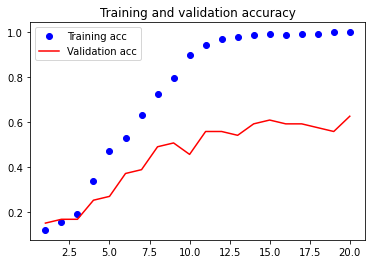

<Figure size 432x288 with 0 Axes>

In [31]:
plt.plot(epochs, acc, 'bo',label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

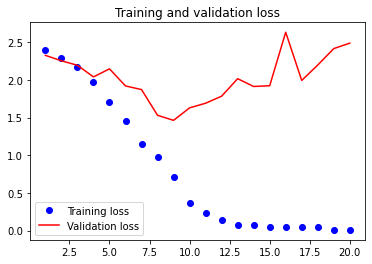

In [32]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#___________________Model 2_____________________
#Specifying the folder where images are present

In [34]:
TrainingImagePath="C:/Users/Omkar/Train"

In [35]:
validationImagePath = "C:/Users/Omkar/Validation"

In [36]:
from keras.preprocessing.image import ImageDataGenerator

In [37]:
train_datagen = ImageDataGenerator(rescale=1./225, shear_range=0.5, 
                                   zoom_range=0.5, width_shift_range=0.2,
                                   height_shift_range=0.2)

In [38]:
test_datagen = ImageDataGenerator(rescale=1./225)

In [39]:
training_set = train_datagen.flow_from_directory(TrainingImagePath,
                                                 target_size=(64, 64),
                                                 batch_size=20,
                                                 class_mode='categorical')

Found 139 images belonging to 11 classes.


In [40]:
validation_set = test_datagen.flow_from_directory(validationImagePath,
                                                  target_size=(64, 64),
                                                  batch_size=20,
                                                  class_mode='categorical')

Found 59 images belonging to 11 classes.


'''______________________Create CNN deep learning model'''

In [41]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [42]:
classifier= Sequential()

In [43]:
classifier.add(Convolution2D(32, kernel_size=(3, 3), input_shape=(64,64,3), activation='relu'))

In [44]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [45]:
classifier.add(Convolution2D(64, kernel_size=(3, 3), activation='relu'))

In [46]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [47]:
classifier.add(Convolution2D(64, kernel_size=(3, 3), activation='relu'))

In [48]:
classifier.add(Flatten())

In [49]:
classifier.add(Dense(64, activation='relu'))

In [50]:
classifier.add(Dense(11, activation='softmax'))

In [51]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 9216)             

In [52]:
classifier.compile(loss='categorical_crossentropy', 
                   optimizer = 'adam', metrics=["accuracy"])

In [53]:
history = classifier.fit_generator(training_set, epochs=100, 
                         validation_data=validation_set)

C:\Users\Omkar\AppData\Local\Temp/ipykernel_9768/1988347780.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(training_set, epochs=100,


Epoch 1/100
7/7 [==============================] - 7s 794ms/step - loss: 2.4271 - accuracy: 0.1007 - val_loss: 2.3539 - val_accuracy: 0.1017
Epoch 2/100
7/7 [==============================] - 6s 886ms/step - loss: 2.3331 - accuracy: 0.1007 - val_loss: 2.2927 - val_accuracy: 0.1525
Epoch 3/100
7/7 [==============================] - 7s 956ms/step - loss: 2.3209 - accuracy: 0.1439 - val_loss: 2.2573 - val_accuracy: 0.1695
Epoch 4/100
7/7 [==============================] - 5s 710ms/step - loss: 2.2851 - accuracy: 0.1655 - val_loss: 2.2293 - val_accuracy: 0.2373
Epoch 5/100
7/7 [==============================] - 6s 952ms/step - loss: 2.2671 - accuracy: 0.1367 - val_loss: 2.1710 - val_accuracy: 0.2034
Epoch 6/100
7/7 [==============================] - 6s 788ms/step - loss: 2.2325 - accuracy: 0.2086 - val_loss: 2.0956 - val_accuracy: 0.2034
Epoch 7/100
7/7 [==============================] - 6s 835ms/step - loss: 2.1718 - accuracy: 0.1942 - val_loss: 2.0986 - val_accuracy: 0.2203
Epoch 8/100
7

In [55]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

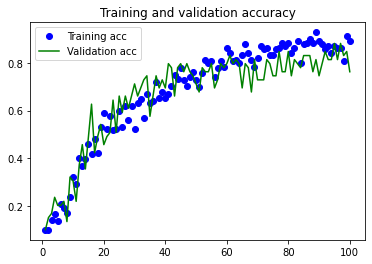

<Figure size 432x288 with 0 Axes>

In [56]:
plt.plot(epochs, acc, 'bo',label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

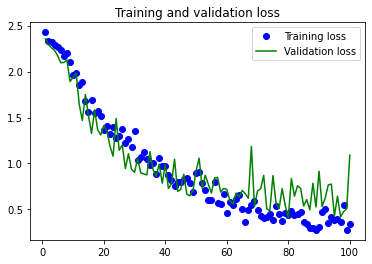

In [57]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [58]:
from keras.applications import VGG16

In [59]:
conv_base = VGG16(weights='imagenet', include_top=False,
                  input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 19s 0us/step


In [60]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [61]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [62]:
TrainingImagePath="C:/Users/Omkar/Train"
validationImagePath = "C:/Users/Omkar/Validation"

In [63]:
datagen = ImageDataGenerator(rescale=1./255)

In [64]:
batch_size = 20

In [66]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150, 150),
                                            batch_size=batch_size,
                                            class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [67]:
train_features, train_labels = extract_features(TrainingImagePath, 139)

Found 139 images belonging to 11 classes.
1/1 [==============================] - 2s 2s/step


In [68]:
validation_features, validation_labels = extract_features(validationImagePath, 59)

Found 59 images belonging to 11 classes.
1/1 [==============================] - 1s 1s/step


In [70]:
train_features.shape #139, 4, 4, 512
train_features = np.reshape(train_features, (139, 4*4* 512))

In [71]:
train_features.shape

(139, 8192)

In [72]:
validation_features.shape
validation_features = np.reshape(validation_features, (59, 4*4* 512))
validation_features.shape 

(59, 8192)

In [73]:
train_labels.shape #139,
from keras.utils import to_categorical
train_labels_cat = to_categorical(train_labels)
train_labels_cat.shape

(139, 11)

In [74]:
validation_labels.shape #59,
valid_labels_cat = to_categorical(validation_labels)
valid_labels_cat.shape

(59, 11)

In [75]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(11, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [76]:
history = model.fit(train_features, train_labels_cat,epochs=30,batch_size=20,
                    validation_data=(validation_features, valid_labels_cat))

Epoch 1/30
7/7 [==============================] - 1s 45ms/step - loss: 2.9050 - acc: 0.2374 - val_loss: 1.4074 - val_acc: 0.5085
Epoch 2/30
7/7 [==============================] - 0s 29ms/step - loss: 1.2630 - acc: 0.5755 - val_loss: 0.7615 - val_acc: 0.7797
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5553 - acc: 0.8417 - val_loss: 0.7154 - val_acc: 0.7627
Epoch 4/30
7/7 [==============================] - 0s 28ms/step - loss: 0.3395 - acc: 0.9281 - val_loss: 0.4923 - val_acc: 0.8475
Epoch 5/30
7/7 [==============================] - 0s 29ms/step - loss: 0.2902 - acc: 0.8921 - val_loss: 0.4130 - val_acc: 0.8305
Epoch 6/30
7/7 [==============================] - 0s 27ms/step - loss: 0.1523 - acc: 0.9856 - val_loss: 0.3919 - val_acc: 0.8983
Epoch 7/30
7/7 [==============================] - 0s 28ms/step - loss: 0.1421 - acc: 0.9640 - val_loss: 0.4134 - val_acc: 0.8644
Epoch 8/30
7/7 [==============================] - 0s 29ms/step - loss: 0.0827 - acc: 0.9856 - val

In [78]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

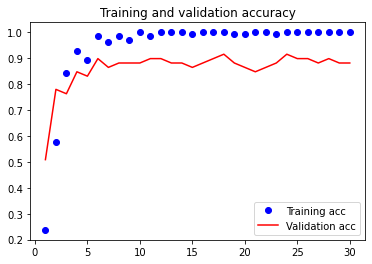

<Figure size 432x288 with 0 Axes>

In [79]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

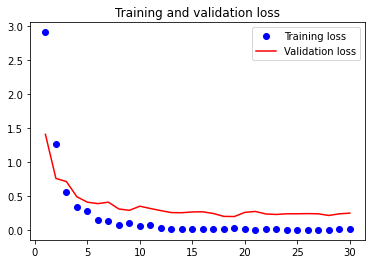

In [80]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()